# 머신러닝

## 빅데이터 등장
- 4차 산업 기술의 발전으로 대용량의 데이터가 디지털로 저장되고 있다.
- 머신러닝, IoT 등 기술과 협력해 사용되고 있다.

## 머신러닝
- 빅데이터를 분석할 수 있는 도구
- 예측, 패턴파악, 추천 시스템 등에 사용
- 지도학습, 비지도학습, 강화학습의 종류가 있음.

### 지도학습 & 비지도학습 & 강화학습
- 지도학습 & 비지도학습

예측할 결과에 대한 정답 데이터가 있는지

예) 사진의 물체를 예측하는 모델

=> 사진안의 물체를 알때 지도학습

=> 사진안의 물체를 모를때 비지도학습

- 강화학습
데이터가 없어도 스스로 학습할 데이터 생성 => 그 데이터를 바탕으로 학습

## 1. 자료 형테 파악하기

### 수치형 자료
=> 양적 자료

=> 수치로 측정가능한 키, 나이, 성적 등

### 범주형 자료
=> 수치로 측정하기 어려운 성별, 지역 등

#### 자료 구분 시 주의점
1. 범주형 자료가 수치로 : 남녀 구별 시 남:1 여:2 => 범주형 자료
2. 수치형 자료를 구간화 : 20~30세 등 => 범주형 자료





### 범주형 자료 요약

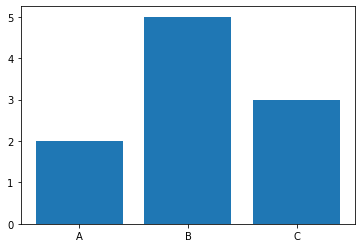

In [3]:
import matplotlib.pyplot as plt

labels = ['A', 'B', 'C']
ratio = [2,5,3]

fig, ax = plt.subplots()
plt.bar(labels, ratio)
plt.show()

### 수치형 자료 요약

- 범주형 자료와는 달리 수치로 구성되어 있기에 통계값을 사용
- 많은 데이터를 의미 있는 수치로 대략적 분포상태 파악가능
- 평균
- 퍼진 정도 측도 : 평균만으로 파악하기 부족 => 분산, 표준 편차 등 활용

98.4
75.91


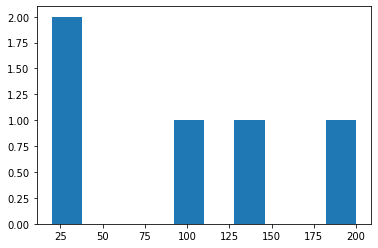

In [10]:
import numpy as np
from statistics import stdev

data = np.array([100, 20, 30, 200, 142])
## 평균
data_mean = data.mean()
print(round(data_mean, 2))

## 표준편차
data_stv = stdev(data)
print(round(data_stv, 2))

fig, ax = plt.subplots()
plt.hist(data)
plt.show()

## 2. 데이터 전 처리

### 머신러닝 과정
1. 데이터 수집
2. 데이터 분석 및 전 처리 => 머신러닝에 사용할 형태로 전 처리
3. 머신러닝 학습
4. 머신러닝 평가

### 데이터 전 처리 필요성

- 대부분 머신러닝 모델은 숫자 데이터 입력 받는다
- 다양한 데이터 형태(이미지, 자연어 등)
- 머신러닝 모델이 이해할 수 있는 수치형 자료로 변환
- 데이터 정제 : 데이터의 결측값 및 이상치 처리
- 데이터 분리 : 학습용 및 평가용 데이터 분리


### 범주형 자료 전 처리

#### 타이타닉 생존자 데이터

- 명목형 자료 : 수치크기 의미 없음
    - 수치 맵핑 변환
    
    0,1로 매핑 => 0,100 등은 모델에 따라 성능 달라질 수 있다.
    - 더미 기법
    
    각 범주를 0 or 1로 변환
- 순서형
    - 수치 매핑 변환

In [19]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 수치 매핑

In [17]:
titanic = titanic.replace({
    'male':0, 'female':1
})

print(titanic.head())

   survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    0  22.0      1      0   7.2500        S  Third    man   
1         1       1    1  38.0      1      0  71.2833        C  First  woman   
2         1       3    1  26.0      0      0   7.9250        S  Third  woman   
3         1       1    1  35.0      1      0  53.1000        S  First  woman   
4         0       3    0  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  


#### 더미 방식

In [21]:
dummies = pd.get_dummies(titanic[['embarked']])
print(dummies.head())

   embarked_C  embarked_Q  embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1


### 수치형 자료 전처리

수치로 이뤄져있어 바로 사용할 수 있자만 모델의 성능을 위해 변환 필요

1. 스케일링
- 변수 값의 범위 및 크기를 변환
- 변수간의 범위가 차이 나면 사용

    1) 정규화
    
    2) 표준화
    
    3) 범주화

#### 1) 정규화

In [25]:
def convert(data):
    data = (data-data.min())/data.max()-data.min()
    return data

print(titanic['fare'])
Fare = convert(titanic['fare'])
print("변환 후")
print(Fare)

    

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64
변환 후
0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: fare, Length: 891, dtype: float64


#### 2)표준화

In [27]:
def standard(data):
    data = (data-data.mean())/data.std()
    return data

titanic = sns.load_dataset('titanic')
print(titanic['fare'])

Fare = standard(titanic['fare'])
print('변환 후')
print(Fare)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64
변환 후
0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: fare, Length: 891, dtype: float64


### 데이터 정제 및 분리하기

#### 결측치 처리하기
머신러닝 모델의 입력 값으로 결측값 사용할 수 없다. Null, NaN 등

처리 방식

1) 샘플 삭제

2) 결측값 많이 존재하는 변수 삭제

3) 다른 값으로 대체

#### 이상치 처리하기 

이상치 존재 시 성능 저하할 수 있다.

일반적으로 전 처리 과정에서 제거

이상치 판단 기준이 중요

처리 방식

1) 통계 지표(카이제곱 등)

2) 데이터 분포 보고 직접 판단

3) 머신러닝 기법 사용 분류

#### 데이터 분리
머신러닝 모델을 평가하기 위해서 학습에 사용하지 않은 평가용 데이터 필요

#### 지도학습 데이터 분리
- feature 데이터 : label 예측위한 값
- Label 데이터 : 예측해야 할 대상이 되는 데이터

|공부시간|시험점수|공부 시간 대비 시험점 수|
|--|--|--|
|feature|label||

In [37]:
from sklearn.model_selection import train_test_split

titanic_1 = sns.load_dataset('titanic')

# 결측값 제거
titanic_2 = titanic_1.dropna()

# 이상치 처리
titanic_3 = titanic_2[titanic_2['age']-np.floor(titanic_2['age']) == 0 ]

# feature & label 데이터 분리
X = titanic_3.drop(columns=['survived']) # Survived 변수를 제거하여 X에 저장합니다.
y = titanic_3['survived'] # Survived 변수를 y에 저장합니다.

# 학습 및 평가용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 분리한 데이터의 개수를 출력합니다.
print('학습용 데이터 개수: %d' %(len(X_train)))
print('평가용 데이터 개수: %d' %(len(X_test)))

학습용 데이터 개수: 124
평가용 데이터 개수: 54


## 회귀 분석
데이터 모델을 찾아 입력값에 따른 미래 결과값 예측 알고리즘

### 문제정의
- 데이터 : 과거 평균 기온 & 아이스크림 판매량
- 가정 : 평균 기온과 판매량은 선형적인 관계
- 목표 : 평균 기온에 따른 판매량 예측

### 01 단순 선형 회귀
$Y = B_0 + B_1X$